In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [36]:
# = "https://raw.githubusercontent.com/akash9579/work/master/covid/datasets_549966_1296705_complete.csv"
data = pd.read_csv('/content/datasets_557629_1459761_covid_19_india.csv')
#data = pd.read_csv(a)

In [37]:
print(datetime.datetime.strptime("21/12/08", "%d/%m/%y").strftime("%m-%d"))
#https://www.programiz.com/python-programming/datetime/strptime

12-21


In [38]:
for i in range(0,data.shape[0]):
  data.Date[i]=datetime.datetime.strptime(data.Date[i], "%d/%m/%y").strftime("%y-%m-%d")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
data.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,20-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,20-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,20-02-01,6:00 PM,Kerala,2,0,0,0,2


In [40]:
data_num_india = data.groupby('Date')["Confirmed", "Cured", "Deaths"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [41]:
data_num_india

,Confirmed,Cured,Deaths
Date,,,
20-01-30,1,0,0
20-01-31,1,0,0
20-02-01,2,0,0
20-02-02,3,0,0
20-02-03,3,0,0
...,...,...,...
20-08-29,3463972,2648998,62550
20-08-30,3542733,2713933,63498
20-08-31,3621245,2774801,64469


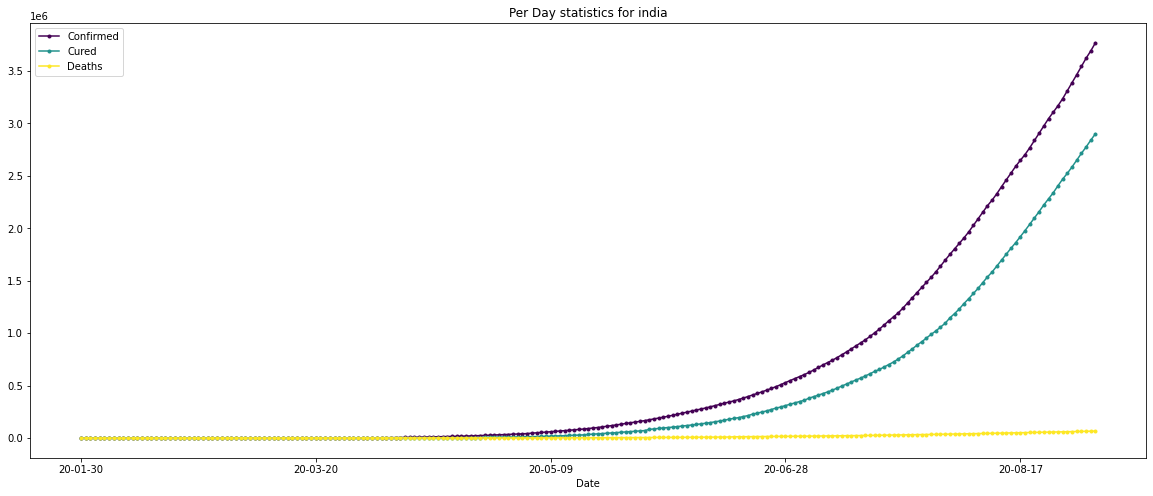

Text(0, 0.5, 'Number of cases')

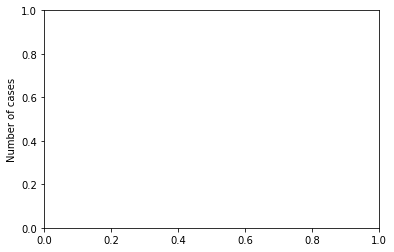

In [42]:
data_num_india.plot(figsize=(20,8),title='Per Day statistics for india',colormap='viridis',marker='.')
plt.show()
plt.ylabel('Number of cases') 
#https://matplotlib.org/3.1.1/api/markers_api.html

In [43]:
output = data_num_india.Confirmed

In [44]:
output

Date
20-01-30          1
20-01-31          1
20-02-01          2
20-02-02          3
20-02-03          3
             ...   
20-08-29    3463972
20-08-30    3542733
20-08-31    3621245
20-09-01    3691166
20-09-02    3769523
Name: Confirmed, Length: 217, dtype: int64

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
output=scaler.fit_transform(np.array(output).reshape(-1,1))

In [46]:
##splitting dataset into train and test split
training_size=int(len(output)*0.60)
test_size=len(output)-training_size
train_data,test_data=output[0:training_size,:],output[training_size:len(output),:1]

In [47]:
test_data.shape

(87, 1)

In [48]:
training_size,test_size

(130, 87)

In [49]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1): # we have to exclude last 99 data***
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99--->X   100---->Y 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])###??????????
	return numpy.array(dataX), numpy.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 40
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
# reshape input to be [samples, time steps, features] which is required for LSTM ?????????????????
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [52]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(40,1)))
model.add(LSTM(50,return_sequences=True))
model.add((LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 679ms/step - loss: 4.4463e-04 - val_loss: 0.2973
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 3.0782e-04 - val_loss: 0.2778
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 2.2974e-04 - val_loss: 0.2472
Epoch 4/100
2/2 [==============================] - 0s 49ms/step - loss: 2.3028e-04 - val_loss: 0.2033
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 1.8257e-04 - val_loss: 0.1526
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 1.5394e-04 - val_loss: 0.1066
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 1.1738e-04 - val_loss: 0.0568
Epoch 8/100
2/2 [==============================] - 0s 43ms/step - loss: 8.1012e-05 - val_loss: 0.0123
Epoch 9/100
2/2 [==============================] - 0s 39ms/step - loss: 4.6250e-05 - val_loss: 5.3507e-04
Epoch 10/100
2/2 [==============================] - 0s 45ms/step - loss: 1.34

In [54]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [55]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
test_predict.shape

(46, 1)

In [57]:
scaler.inverse_transform(output).shape

(217, 1)

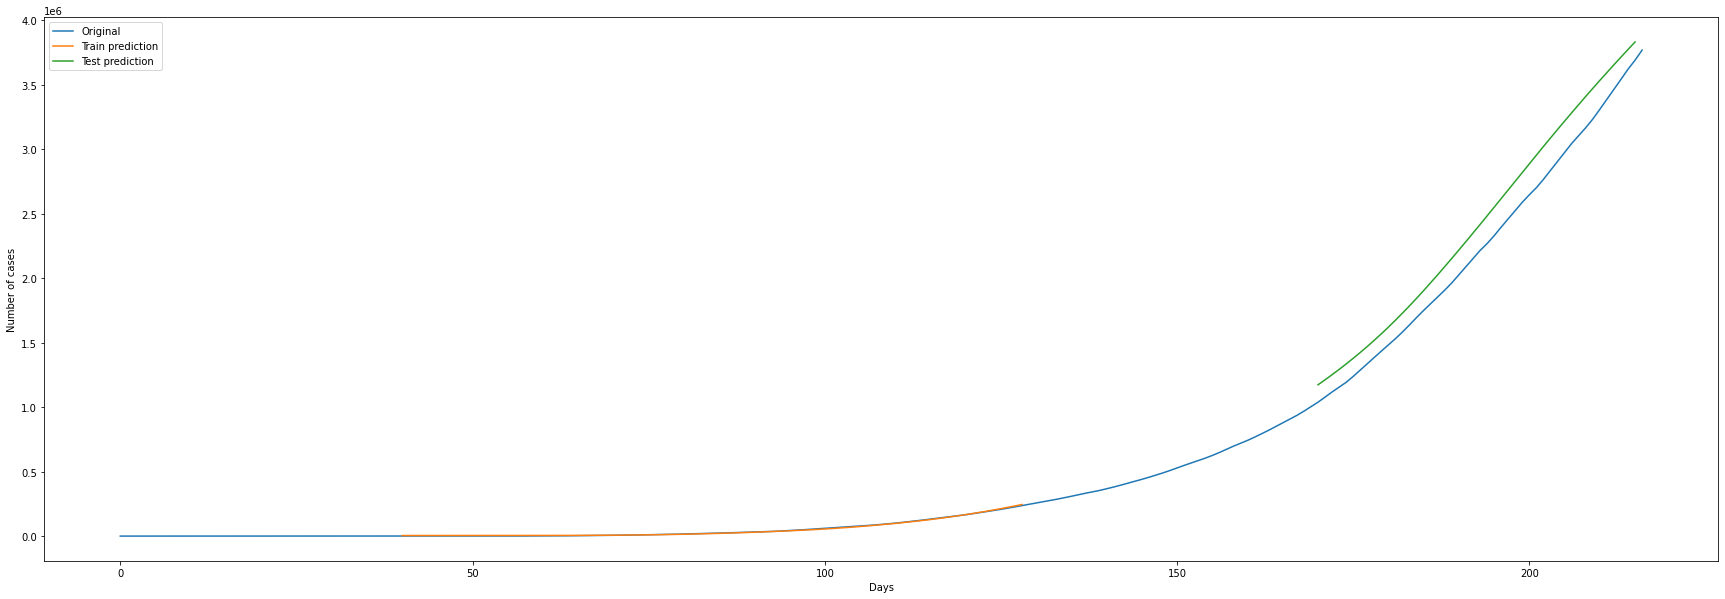

In [58]:
# shift train predictions for plotting
look_back=40

# reshape the figure
plt.figure(figsize=(30,10))

#first make empty numpy array of same size of df1
trainPredictPlot = numpy.empty_like(output)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(output)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(output)-1, :] = test_predict

# For plotting purpose we use following
# plot baseline and predictions
plt.plot(scaler.inverse_transform(output),label='Original')
plt.plot(trainPredictPlot,label='Train prediction')
plt.plot(testPredictPlot,label='Test prediction')
plt.legend()
plt.ylabel('Number of cases') 
plt.xlabel('Days') 
plt.show()

In [59]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
#tf.keras.layers.GRU
model1=Sequential()
model1.add(GRU(50,return_sequences=True,input_shape=(40,1)))
model1.add(GRU(50,return_sequences=True))
model1.add((GRU(50)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 40, 50)            7950      
_________________________________________________________________
gru_4 (GRU)                  (None, 40, 50)            15300     
_________________________________________________________________
gru_5 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________


In [60]:
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 513ms/step - loss: 4.5960e-04 - val_loss: 0.2770
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 3.3762e-04 - val_loss: 0.2497
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 2.8040e-04 - val_loss: 0.1919
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 1.7746e-04 - val_loss: 0.1268
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 1.8036e-04 - val_loss: 0.0883
Epoch 6/100
2/2 [==============================] - 0s 45ms/step - loss: 1.0210e-04 - val_loss: 0.0623
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 1.0404e-04 - val_loss: 0.0302
Epoch 8/100
2/2 [==============================] - 0s 46ms/step - loss: 4.0675e-05 - val_loss: 0.0059
Epoch 9/100
2/2 [==============================] - 0s 45ms/step - loss: 5.9795e-05 - val_loss: 1.5608e-04
Epoch 10/100
2/2 [==============================] - 0s 49ms/step - loss: 8.39

In [61]:
### Lets Do the prediction and check performance metrics
train_predict1=model1.predict(X_train)
test_predict1=model1.predict(X_test)

In [62]:
##Transformback to original form
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

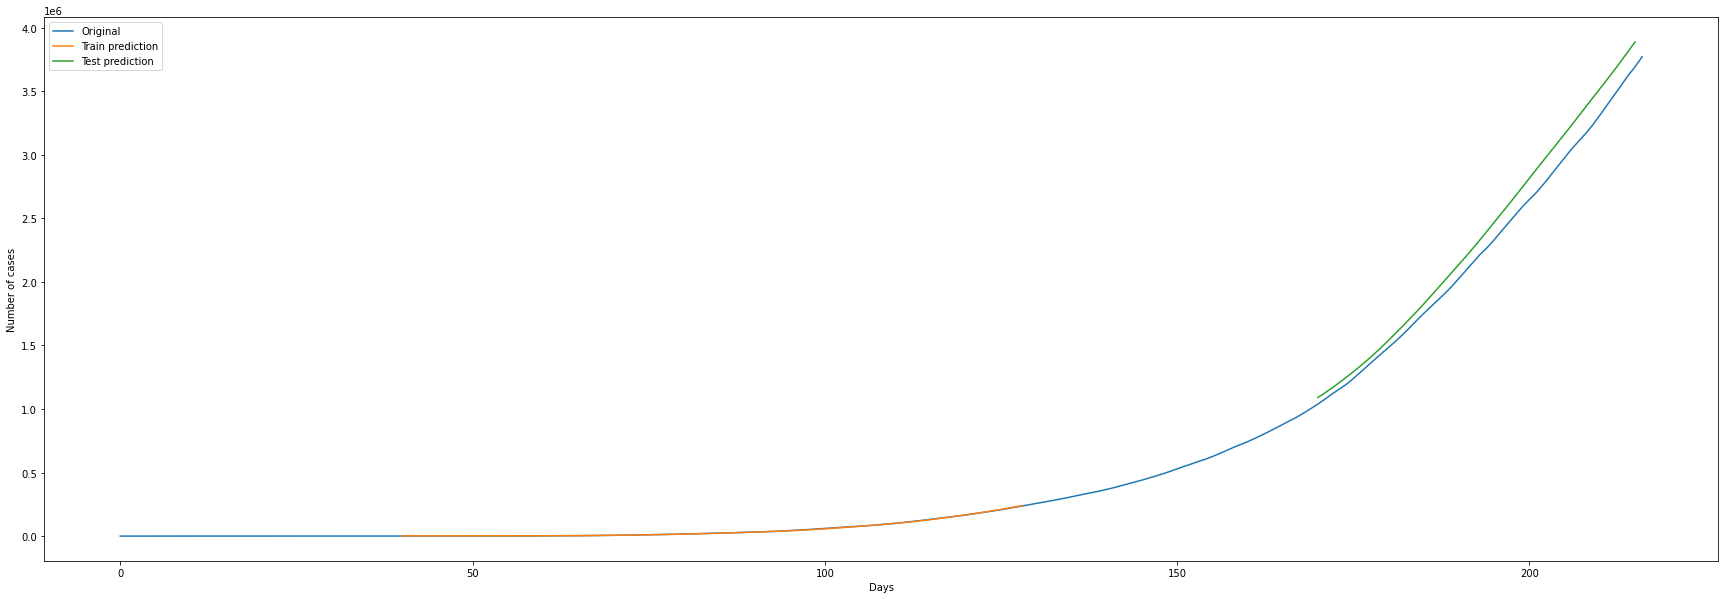

In [63]:
# shift train predictions for plotting
look_back=40

# reshape the figure
plt.figure(figsize=(30,10))

#first make empty numpy array of same size of df1
trainPredictPlot = numpy.empty_like(output)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(output)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(output)-1, :] = test_predict1

# For plotting purpose we use following
# plot baseline and predictions
plt.plot(scaler.inverse_transform(output),label='Original')
plt.plot(trainPredictPlot,label='Train prediction')
plt.plot(testPredictPlot,label='Test prediction')
plt.legend()
plt.ylabel('Number of cases') 
plt.xlabel('Days') 
plt.show()

In [64]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
#tf.keras.layers.GRU
model2=Sequential()
model2.add(SimpleRNN(50,return_sequences=True,input_shape=(40,1)))
model2.add(SimpleRNN(50,return_sequences=True))
model2.add((SimpleRNN(50)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 40, 50)            2600      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 40, 50)            5050      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 12,751
Trainable params: 12,751
Non-trainable params: 0
_________________________________________________________________


In [65]:
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 189ms/step - loss: 0.0941 - val_loss: 0.1898
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0397 - val_loss: 0.5604
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0113 - val_loss: 0.7121
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0040 - val_loss: 0.8168
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0031 - val_loss: 0.8072
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0022 - val_loss: 0.7359
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0019 - val_loss: 0.7300
Epoch 8/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0018 - val_loss: 0.6563
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.6169
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 9.9736e-04 - val_loss: 0.6164
Epoch 11/100
2

In [66]:
### Lets Do the prediction and check performance metrics
train_predict2=model2.predict(X_train)
test_predict2=model2.predict(X_test)

In [67]:
##Transformback to original form
train_predict2=scaler.inverse_transform(train_predict2)
test_predict2=scaler.inverse_transform(test_predict2)

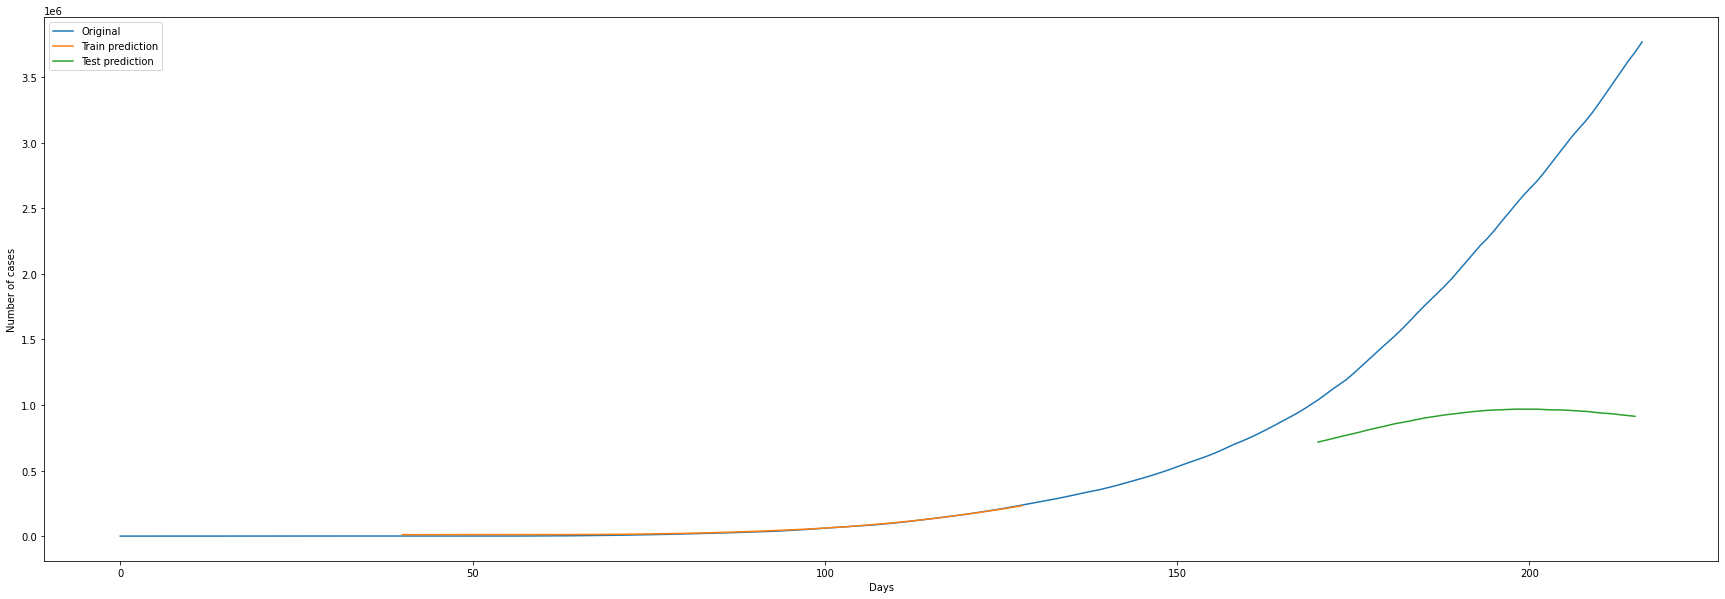

In [68]:
# shift train predictions for plotting
look_back=40

# reshape the figure
plt.figure(figsize=(30,10))

#first make empty numpy array of same size of df1
trainPredictPlot = numpy.empty_like(output)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_predict2)+look_back, :] = train_predict2

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(output)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict2)+(look_back*2)+1:len(output)-1, :] = test_predict2

# For plotting purpose we use following
# plot baseline and predictions
plt.plot(scaler.inverse_transform(output),label='Original')
plt.plot(trainPredictPlot,label='Train prediction')
plt.plot(testPredictPlot,label='Test prediction')
plt.legend()
plt.ylabel('Number of cases') 
plt.xlabel('Days') 
plt.show()